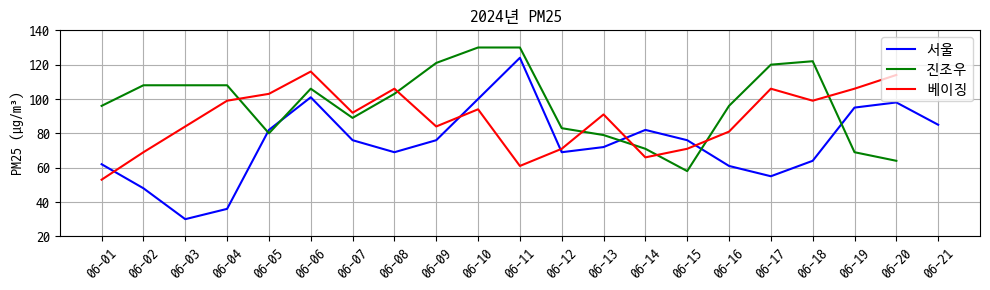

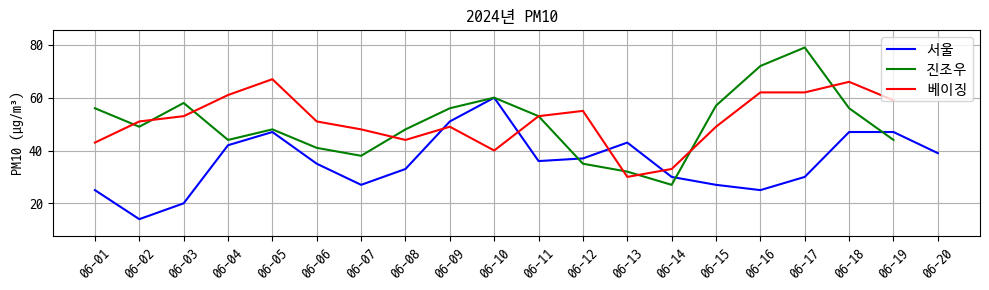

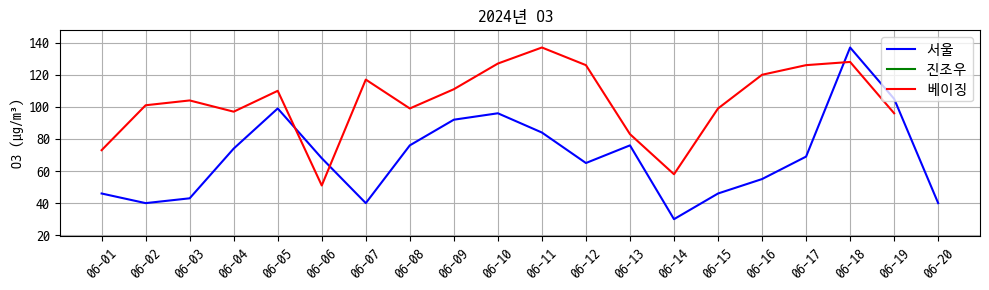

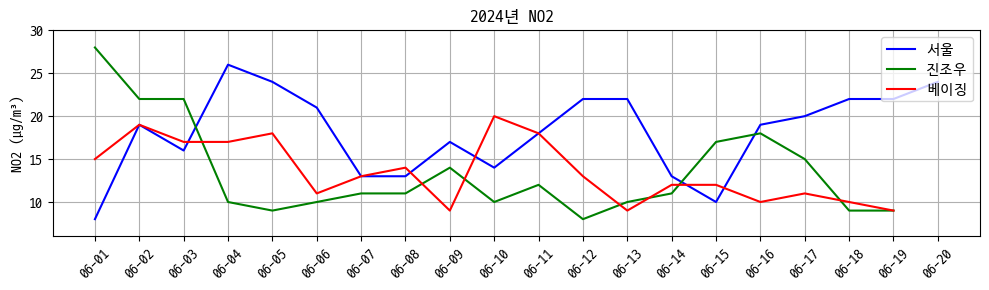

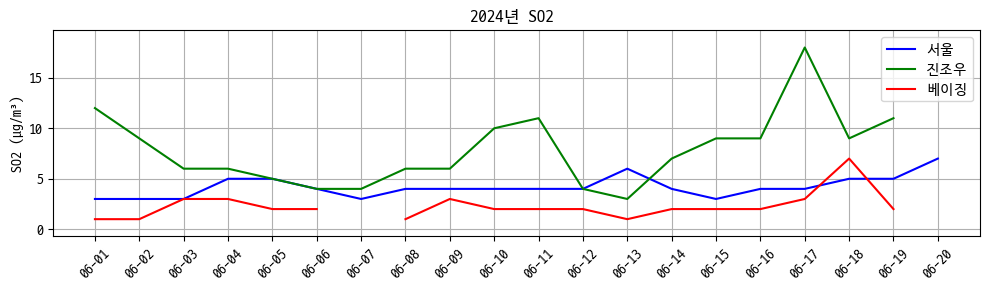

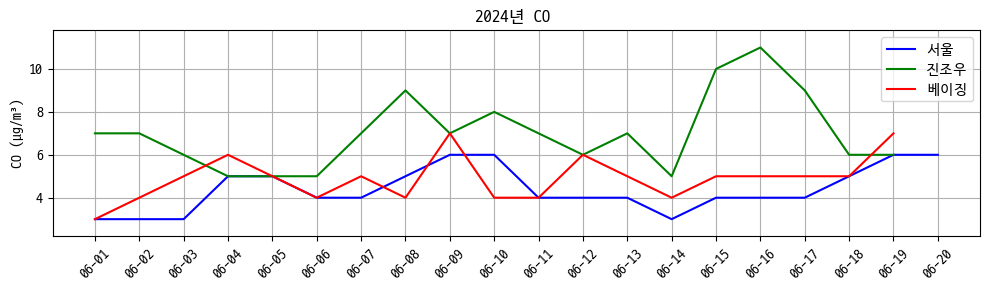

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# 파일의 인코딩 감지
df1 = pd.read_csv('D:\FILE\서울.csv')
df2 = pd.read_csv('D:\FILE\진조우.csv')
df3 = pd.read_csv('D:\FILE\베이징.csv')
# 예제 데이터 생성 (실제 데이터에 맞게 수정 필요)
서울 = df1
진조우 = df2
베이징 = df3

# 공백 제거 및 소문자로 변환
for data in [서울, 진조우, 베이징]:
    data.columns = data.columns.str.strip().str.lower()

# 날짜 컬럼을 datetime 형식으로 변환
for data in [서울, 진조우, 베이징]:
    data['date'] = pd.to_datetime(data['date'])
dfyear = 2024
dfdate = 6
# 2024년 5월 데이터 필터링
서울_2024 = 서울[(서울['date'].dt.year == dfyear) & (서울['date'].dt.month == dfdate)]
진조우_2024 = 진조우[(진조우['date'].dt.year == dfyear) & (진조우['date'].dt.month == dfdate)]
베이징_2024 = 베이징[(베이징['date'].dt.year == dfyear) & (베이징['date'].dt.month == dfdate)]

# 년도별 색상 설정
colors = ['b', 'g', 'r']
years1 = 서울_2024['date'].dt.year.unique()
years2 = 진조우_2024['date'].dt.year.unique()
years3 = 베이징_2024['date'].dt.year.unique()


# 각 컬럼에 대한 그래프 그리기
pollutants = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for pollutant in pollutants:
    plt.rcParams['font.family'] = 'D2coding'
    plt.figure(figsize=(10, 3))
    
    # 서울 그래프 추가
    all_data = []
    for year in years1:
        yearly_data = 서울_2024[서울_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='서울', color='b')
    
    # 진조우 그래프 추가
    for year in years2:
        yearly_data = 진조우_2024[진조우_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='진조우', color='g')
    
    # 베이징 그래프 추가
    for year in years3:
        yearly_data = 베이징_2024[베이징_2024['date'].dt.year == year]
        yearly_data[pollutant] = pd.to_numeric(yearly_data[pollutant], errors='coerce')
        all_data.extend(yearly_data[pollutant])
        plt.plot(yearly_data['date'].dt.strftime('%m-%d'), yearly_data[pollutant], label='베이징', color='r')
    
    # 데이터에서 최소 및 최대값 계산
    min_value = min(all_data)
    max_value = max(all_data)
    
    # y축 범위 설정
    y_range = max_value - min_value
    plt.ylim(min_value - 0.1 * y_range, max_value + 0.1 * y_range)
    
    plt.ylabel(f'{pollutant.upper()} (μg/m³)')
    plt.title(f'{dfyear}년 ' f'{pollutant.upper()} ')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

# 데이터 불러오기
beijing = pd.read_csv('D:\\FILE\\베이징.csv')
seoul = pd.read_csv('D:\\FILE\\서울.csv')
jinzhou = pd.read_csv('D:\\FILE\\진조우.csv')

# 데이터 구조 확인
print("Beijing data structure:")
print(beijing.head())
print("\nSeoul data structure:")
print(seoul.head())
print("\nJinzhou data structure:")
print(jinzhou.head())

# 날짜 열을 datetime 형식으로 변환
beijing['date'] = pd.to_datetime(beijing['date'], errors='coerce')
seoul['date'] = pd.to_datetime(seoul['date'], errors='coerce')
jinzhou['date'] = pd.to_datetime(jinzhou['date'], errors='coerce')

# 숫자 데이터만 추출하고 비어있는 값을 NaN으로 대체
beijing_numeric = beijing.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
seoul_numeric = seoul.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
jinzhou_numeric = jinzhou.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')

# ' '을 NaN으로 변환
beijing_numeric.replace(' ', np.nan, inplace=True)
seoul_numeric.replace(' ', np.nan, inplace=True)
jinzhou_numeric.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
beijing_numeric.fillna(beijing_numeric.mean(), inplace=True)
seoul_numeric.fillna(seoul_numeric.mean(), inplace=True)
jinzhou_numeric.fillna(jinzhou_numeric.mean(), inplace=True)

# 각 도시의 PM2.5와 PM10의 상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(beijing_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Beijing')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(seoul_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Seoul')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(jinzhou_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Jinzhou')
plt.show()

# 상관관계 파악을 위해 병합
corr_beijing_seoul = pd.merge(beijing, seoul, on='date', suffixes=('_beijing', '_seoul'))
corr_jinzhou_seoul = pd.merge(jinzhou, seoul, on='date', suffixes=('_jinzhou', '_seoul'))

# 병합된 데이터프레임의 열 이름 확인
print("\nColumns in corr_beijing_seoul:")
print(corr_beijing_seoul.columns)

print("\nColumns in corr_jinzhou_seoul:")
print(corr_jinzhou_seoul.columns)

# 예측 모델 생성 (서울의 PM2.5와 PM10을 예측)
# PM2.5 예측 모델
X_pm25 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]  # 실제 데이터프레임의 컬럼 이름으로 수정
y_pm25 = corr_beijing_seoul[' pm25_seoul']  # 서울의 PM2.5

# 공백을 NaN으로 변환
X_pm25.replace(' ', np.nan, inplace=True)
y_pm25.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_pm25.fillna(X_pm25.astype(float).mean(), inplace=True)
y_pm25.fillna(y_pm25.astype(float).mean(), inplace=True)

X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)

model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

y_pred_pm25 = model_pm25.predict(X_test_pm25)

print(f"\nPM2.5 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm25, y_pred_pm25)}")
print(f"R^2 Score: {r2_score(y_test_pm25, y_pred_pm25)}")

# 공백을 포함한 컬럼 이름들을 모두 수정
corr_beijing_seoul.columns = corr_beijing_seoul.columns.str.replace(' ', '')

# 수정된 컬럼 이름 확인
print(corr_beijing_seoul.columns)

# PM10 예측 모델을 위한 데이터 준비
X_pm10 = corr_beijing_seoul[['pm25_beijing', 'pm10_beijing']]
y_pm10 = corr_beijing_seoul['pm10_seoul']

# 공백을 NaN으로 변환
X_pm10.replace(' ', np.nan, inplace=True)
y_pm10.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_pm10.fillna(X_pm10.astype(float).mean(), inplace=True)
y_pm10.fillna(y_pm10.astype(float).mean(), inplace=True)

X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

y_pred_pm10 = model_pm10.predict(X_test_pm10)

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm10, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test_pm10, y_pred_pm10)}")

# PM10 예측 모델
X = corr_beijing_seoul[['pm25_beijing', 'pm10_beijing']]  # 베이징의 PM2.5, PM10을 사용하여 예측
y = corr_beijing_seoul['pm10_seoul']  # 서울의 PM10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train, y_train에서 공백을 NaN으로 변환 (이미 공백이 NaN으로 변환되어 있다고 가정)
X_train.replace(' ', np.nan, inplace=True)
y_train.replace(' ', np.nan, inplace=True)
X_test.replace(' ', np.nan, inplace=True)
y_test.replace(' ', np.nan, inplace=True)

# NaN 값을 평균값으로 대체
X_train.fillna(X_train.astype(float).mean(), inplace=True)
y_train.fillna(y_train.astype(float).mean(), inplace=True)
X_test.fillna(X_test.astype(float).mean(), inplace=True)
y_test.fillna(y_test.astype(float).mean(), inplace=True)

# PM10 예측 모델 학습
model_pm10 = LinearRegression()
model_pm10.fit(X_train, y_train)

# 예측 결과 출력
y_pred = model_pm10.predict(X_test)

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_pm10)}")

# Convert y_test and y_pred_pm25 to float if they are not already
y_test = y_test.astype(float)
y_pred_pm25 = y_pred_pm25.astype(float)

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual PM2.5')
plt.plot(y_pred_pm25, label='Predicted PM2.5')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual PM10')
plt.plot(y_pred_pm10, label='Predicted PM10')
plt.legend()
plt.title('PM10 Prediction')
plt.show()

# 서울의 PM2.5와 PM10 예측 (2024.06.22 ~ 2024.06.30)
future_dates = pd.date_range(start='2024-06-22', end='2024-06-30').to_frame(index=False, name='date')

# 베이징과 진조우의 미래 데이터를 임의로 생성 (실제 데이터를 사용할 수 있다면 그것을 사용)
future_beijing = pd.DataFrame({
    'date': future_dates['date'],
    'pm25_beijing': [random.randint(50, 150) for _ in range(len(future_dates))],
    'pm10_beijing': [random.randint(30, 100) for _ in range(len(future_dates))]
})

future_jinzhou = pd.DataFrame({
    'date': future_dates['date'],
    'pm25_jinzhou': [random.randint(40, 130) for _ in range(len(future_dates))],
    'pm10_jinzhou': [random.randint(25, 90) for _ in range(len(future_dates))]
})

# 미래 데이터 병합
future_data = pd.merge(future_beijing, future_jinzhou, on='date')

# 서울의 PM2.5와 PM10 예측
future_X_pm25 = future_data[['pm25_beijing', 'pm10_beijing']]
future_pred_pm25 = model_pm25.predict(future_X_pm25)

future_X_pm10 = future_data[['pm25_beijing', 'pm10_beijing']]
future_pred_pm10 = model_pm10.predict(future_X_pm10)

# 결과 출력
future_data['Predicted_PM25'] = future_pred_pm25
future_data['Predicted_PM10'] = future_pred_pm10

print("\nFuture PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):")
print(future_data[['date', 'Predicted_PM25', 'Predicted_PM10']])


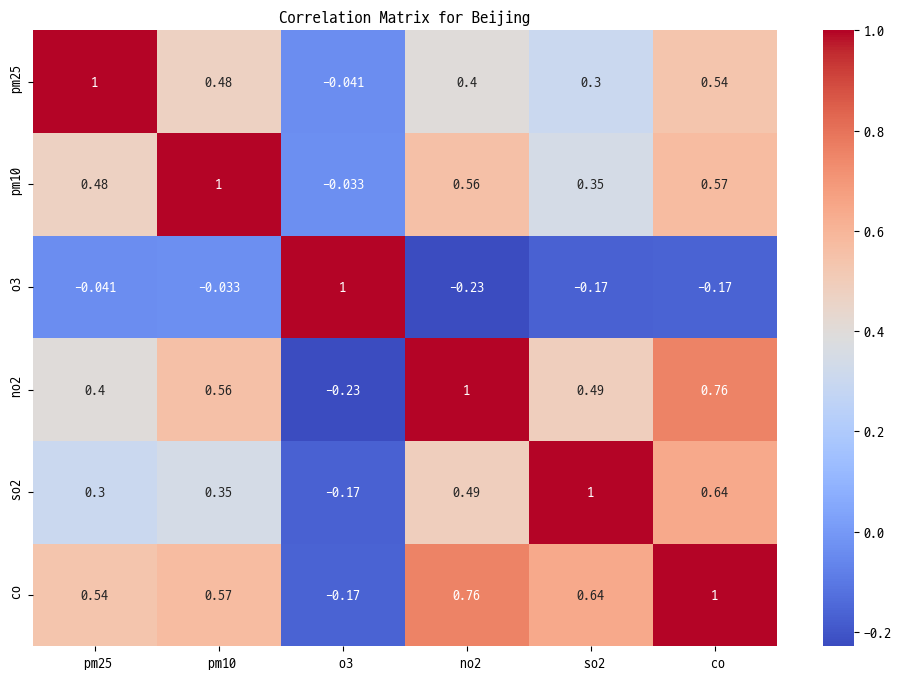

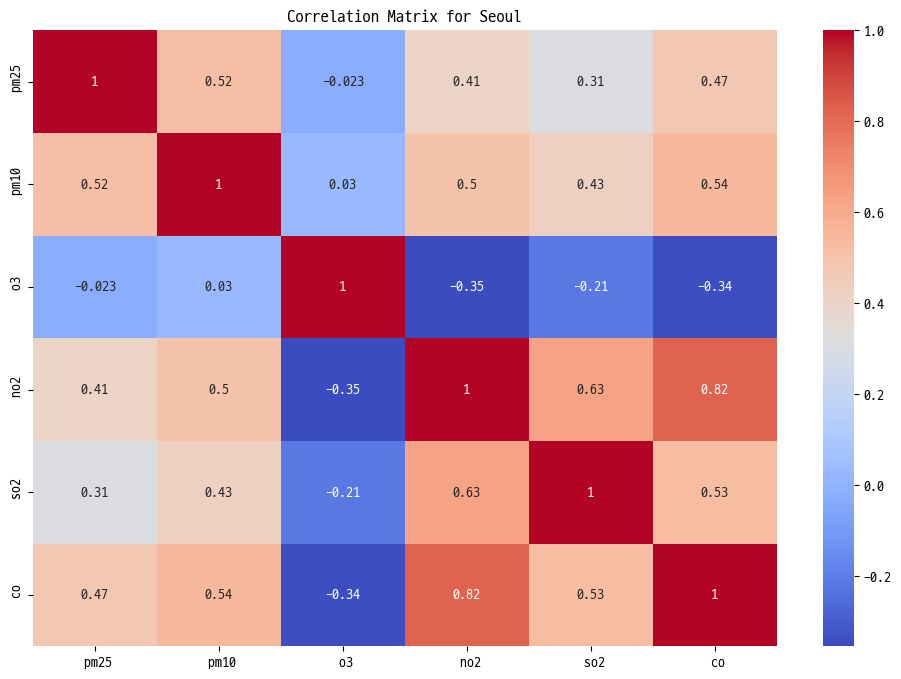

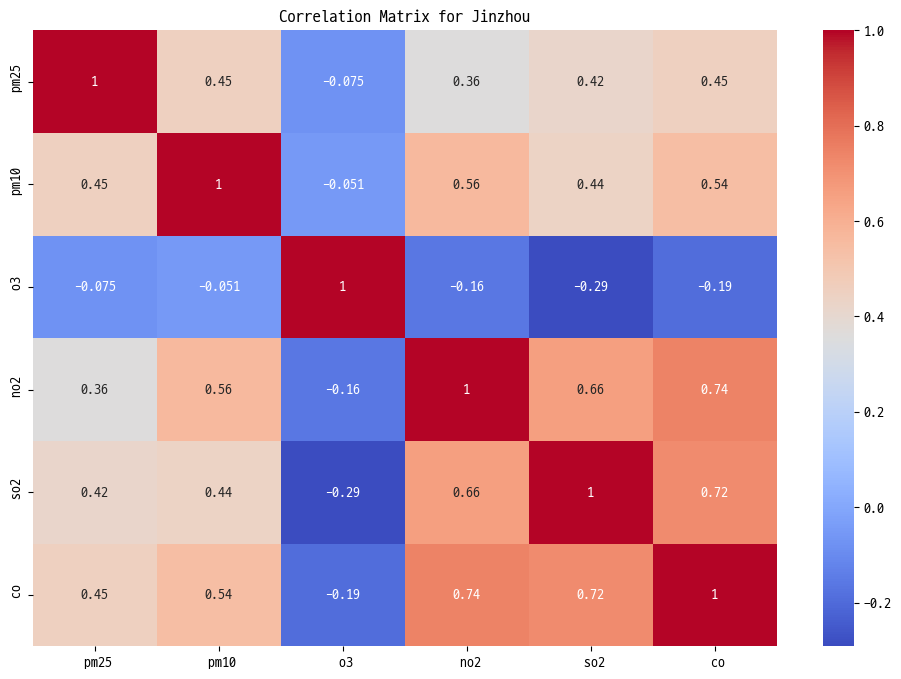

C:\Users\human\AppData\Local\Temp\ipykernel_7348\850816660.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ', np.nan, inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_7348\850816660.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.astype(float).mean(), inplace=True)
C:\Users\human\AppData\Local\Temp\ipykernel_7348\850816660.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ', np.n


PM2.5 Prediction Model Performance:
Mean Squared Error: 1113.8350128633654
R^2 Score: 0.04261676985494922

PM10 Prediction Model Performance:
Mean Squared Error: 579.8050576184909
R^2 Score: 0.0710068906806085


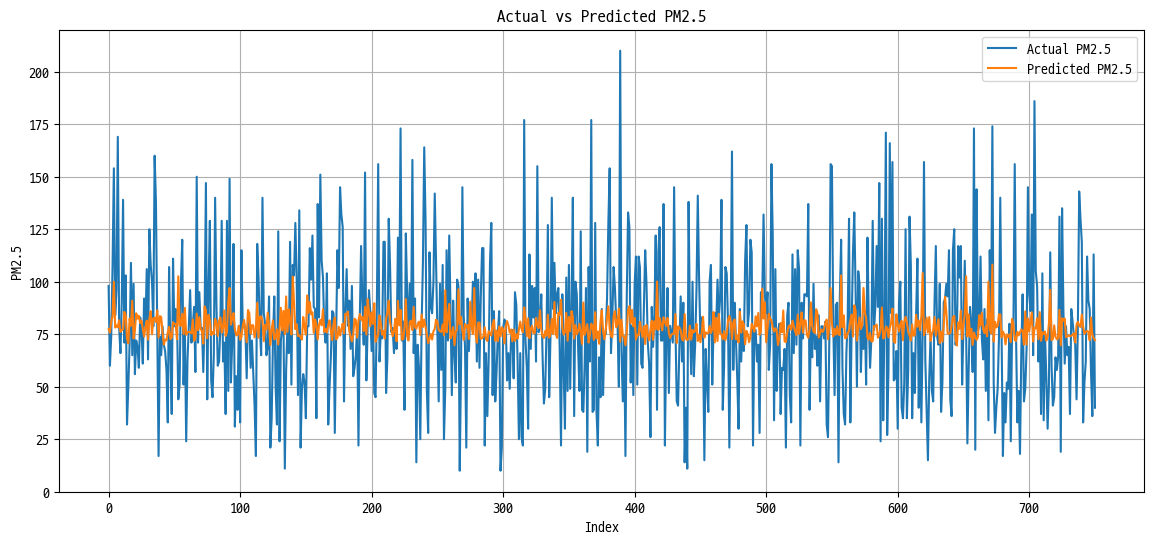

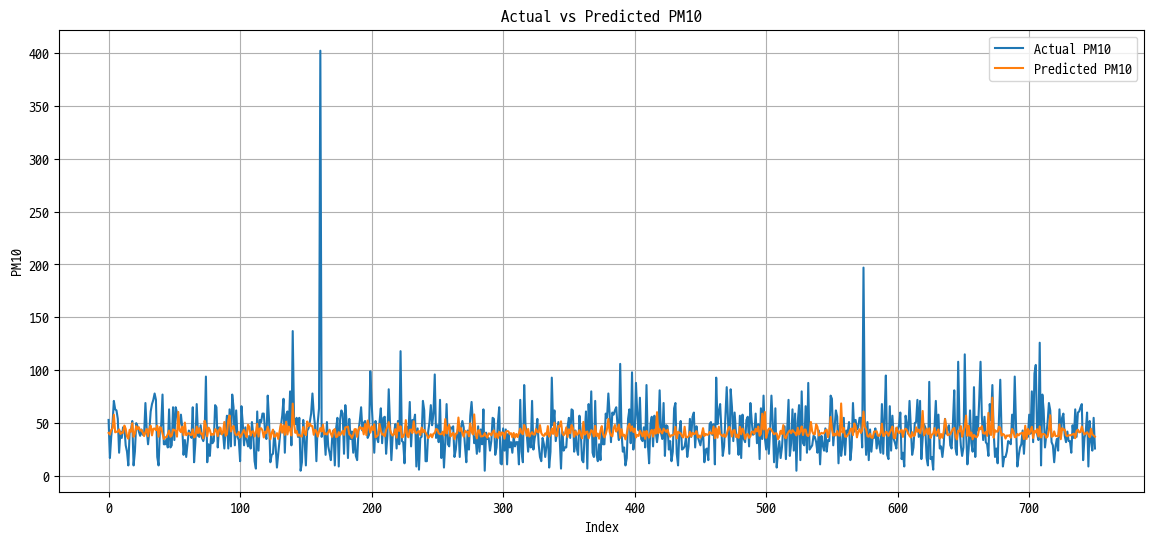


Future PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):
        date  Predicted_PM25  Predicted_PM10
0 2024-06-22       77.385194       40.523879
1 2024-06-23       75.630684       40.374438
2 2024-06-24       80.269495       43.262192
3 2024-06-25       76.744675       40.045815
4 2024-06-26       74.143787       38.692914
5 2024-06-27       79.898521       42.728436
6 2024-06-28       74.288030       38.118341
7 2024-06-29       81.330736       43.830542
8 2024-06-30       74.520764       38.319667


In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import random

# 데이터 불러오기
beijing = pd.read_csv('D:\\FILE\\베이징.csv')
seoul = pd.read_csv('D:\\FILE\\서울.csv')
jinzhou = pd.read_csv('D:\\FILE\\진조우.csv')

# 날짜 열을 datetime 형식으로 변환
beijing['date'] = pd.to_datetime(beijing['date'], errors='coerce')
seoul['date'] = pd.to_datetime(seoul['date'], errors='coerce')
jinzhou['date'] = pd.to_datetime(jinzhou['date'], errors='coerce')

# 숫자 데이터만 추출하고 비어있는 값을 NaN으로 대체하는 함수
def preprocess(df):
    numeric_df = df.drop(columns=['date']).apply(pd.to_numeric, errors='coerce')
    numeric_df.replace(' ', np.nan, inplace=True)
    numeric_df.fillna(numeric_df.mean(), inplace=True)
    # 컬럼명 소문자로 변환
    numeric_df.columns = map(str.lower, numeric_df.columns)
    return numeric_df

# 각 도시의 데이터프레임을 숫자로 변환하여 처리
beijing_numeric = preprocess(beijing)
seoul_numeric = preprocess(seoul)
jinzhou_numeric = preprocess(jinzhou)

# 각 도시의 PM2.5와 PM10의 상관관계 분석
plt.figure(figsize=(12, 8))
sns.heatmap(beijing_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Beijing')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(seoul_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Seoul')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(jinzhou_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Jinzhou')
plt.show()

# 서울과 다른 도시들의 데이터 병합
corr_beijing_seoul = pd.merge(beijing_numeric, seoul_numeric, left_index=True, right_index=True, suffixes=('_beijing', '_seoul'))
corr_jinzhou_seoul = pd.merge(jinzhou_numeric, seoul_numeric, left_index=True, right_index=True, suffixes=('_jinzhou', '_seoul'))

# PM2.5 예측 모델
X_pm25 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]
y_pm25 = corr_beijing_seoul[' pm25_seoul']

# PM10 예측 모델
X_pm10 = corr_beijing_seoul[[' pm25_beijing', ' pm10_beijing']]
y_pm10 = corr_beijing_seoul[' pm10_seoul']

# 데이터 준비
def prepare_data(X, y):
    X.replace(' ', np.nan, inplace=True)
    X.fillna(X.astype(float).mean(), inplace=True)
    y.replace(' ', np.nan, inplace=True)
    y.fillna(y.astype(float).mean(), inplace=True)
    return X.astype(float), y.astype(float)

X_pm25, y_pm25 = prepare_data(X_pm25, y_pm25)
X_pm10, y_pm10 = prepare_data(X_pm10, y_pm10)

# 데이터 분할
X_train_pm25, X_test_pm25, y_train_pm25, y_test_pm25 = train_test_split(X_pm25, y_pm25, test_size=0.2, random_state=42)
X_train_pm10, X_test_pm10, y_train_pm10, y_test_pm10 = train_test_split(X_pm10, y_pm10, test_size=0.2, random_state=42)

# 모델 생성 및 학습
model_pm25 = LinearRegression()
model_pm25.fit(X_train_pm25, y_train_pm25)

model_pm10 = LinearRegression()
model_pm10.fit(X_train_pm10, y_train_pm10)

# 예측
y_pred_pm25 = model_pm25.predict(X_test_pm25)
y_pred_pm10 = model_pm10.predict(X_test_pm10)

# 성능 평가
print(f"\nPM2.5 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm25, y_pred_pm25)}")
print(f"R^2 Score: {r2_score(y_test_pm25, y_pred_pm25)}")

print(f"\nPM10 Prediction Model Performance:")
print(f"Mean Squared Error: {mean_squared_error(y_test_pm10, y_pred_pm10)}")
print(f"R^2 Score: {r2_score(y_test_pm10, y_pred_pm10)}")

# 예측 결과 시각화
plt.figure(figsize=(14, 6))
plt.plot(y_test_pm25.values, label='Actual PM2.5')
plt.plot(y_pred_pm25, label='Predicted PM2.5')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(y_test_pm10.values, label='Actual PM10')
plt.plot(y_pred_pm10, label='Predicted PM10')
plt.legend()
plt.xlabel('Index')
plt.ylabel('PM10')
plt.title('Actual vs Predicted PM10')
plt.grid(True)
plt.show()

# 미래 예측
future_beijing = pd.DataFrame({
    'date': pd.date_range(start='2024-06-22', end='2024-06-30'),
    ' pm25_beijing': [random.randint(50, 150) for _ in range(9)],
    ' pm10_beijing': [random.randint(30, 100) for _ in range(9)]
})

future_jinzhou = pd.DataFrame({
    'date': pd.date_range(start='2024-06-22', end='2024-06-30'),
    ' pm25_jinzhou': [random.randint(40, 130) for _ in range(9)],
    ' pm10_jinzhou': [random.randint(25, 90) for _ in range(9)]
})

future_data = pd.merge(future_beijing, future_jinzhou, on='date')

future_X_pm25 = future_data[[' pm25_beijing', ' pm10_beijing']]
future_X_pm10 = future_data[[' pm25_beijing', ' pm10_beijing']]

future_pred_pm25 = model_pm25.predict(future_X_pm25)
future_pred_pm10 = model_pm10.predict(future_X_pm10)

future_data['Predicted_PM25'] = future_pred_pm25
future_data['Predicted_PM10'] = future_pred_pm10

print("\nFuture PM2.5 and PM10 predictions for Seoul (2024.06.22 ~ 2024.06.30):")
print(future_data[['date', 'Predicted_PM25', 'Predicted_PM10']])


In [99]:
todari = pd.read_csv('D:\FILE\\totalData_List.csv')
todari.sort_values('일시', ascending=False).reset_index(drop=True)


,일시,평균기온(℃),최고기온(℃),최저기온(℃),pm25,pm10,o3,no2,so2,co,평균습도(%rh),강수량(mm),평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg)
0,2024-06-14,26.3,33.0,21.4,82.0,35.0,17.0,13.0,4.0,3.0,56.0,0.0,2.3,5.9,290.0
1,2024-06-13,26.4,32.8,20.0,73.0,43.0,76.0,22.0,6.0,4.0,51.4,0.0,1.8,4.3,250.0
2,2024-06-12,24.8,31.8,19.2,69.0,37.0,65.0,22.0,4.0,4.0,60.8,0.0,2.1,4.7,290.0
3,2024-06-11,25.4,31.6,21.7,125.0,36.0,84.0,18.0,4.0,4.0,62.4,0.0,2.4,4.7,250.0
4,2024-06-10,24.7,31.1,19.0,100.0,61.0,92.0,14.0,4.0,6.0,66.3,0.0,2.2,4.6,200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3502,2014-08-06,24.4,26.2,22.5,100.0,49.0,37.0,39.0,7.0,5.0,92.4,10.5,2.2,4.9,230.0
3503,2014-08-05,26.6,29.2,25.0,89.0,47.0,36.0,27.0,7.0,5.0,87.5,0.0,3.2,4.8,230.0
3504,2014-08-04,26.4,29.6,24.7,27.0,10.0,19.0,23.0,6.0,4.0,93.0,6.5,2.1,4.7,230.0
3505,2014-08-03,26.5,30.5,24.1,21.0,9.0,23.0,13.0,6.0,2.0,87.6,13.0,4.2,7.0,70.0
